In [1]:
# TODO: Optimize MCMC code to run faster using parallelization or multithreading
# TODO: Add detailed docstrings to all functions and classes for better code documentation
# TODO: Implement unit tests
# TODO: Add more flexible parameter grid options for the models
# TODO: Investigate old code to understand why Spearman's rho used to be higher and orders were closer to the ideal order

import sys
import os

# set the path to the parent directory of 'simulation_class'
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from simulation_class.canonical_generator import CanonicalGenerator
from simulation_class.sample_generator import SampleGenerator
from simulation_class.disease_progression_analyzer import DiseaseProgressionAnalyzer
from simulation_class.EBMAnalyzer import EBMAnalyzer

## SIGMOID demo

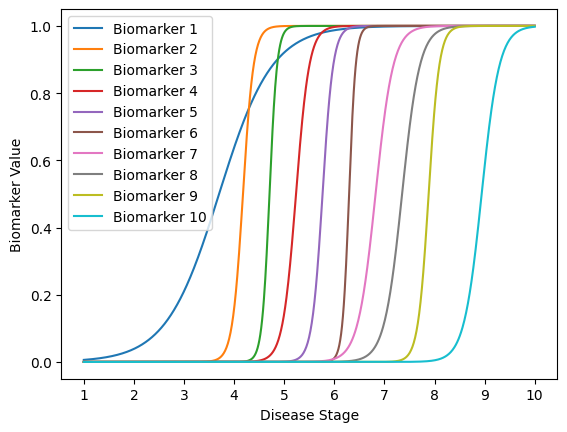

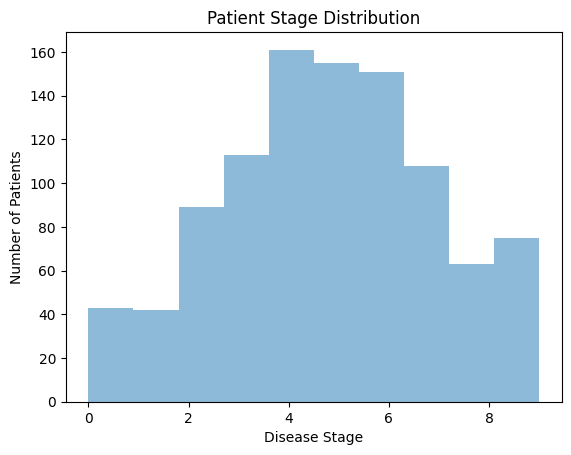

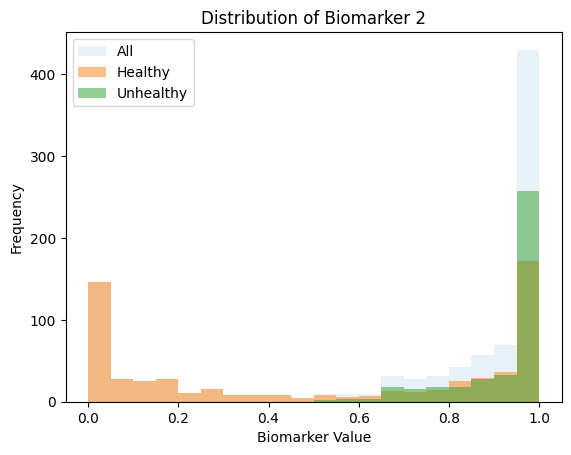

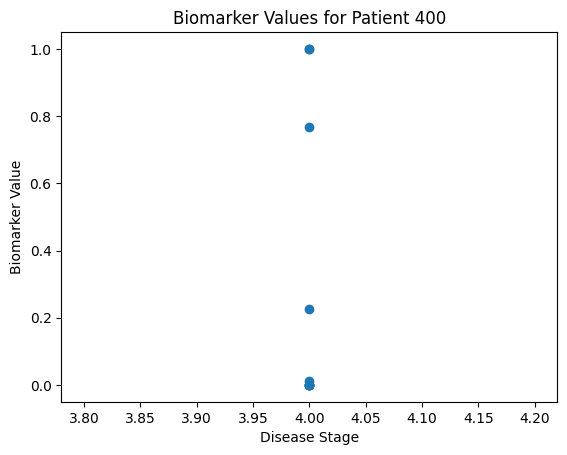

In [2]:
# model parameters
n_biomarker_stages = 10
model_type = 'sigmoid'
biomarkers_params_sigmoid = {
    0: {'s': 0.1, 'c': 1.0},
    1: {'s': 0.5, 'c': 10.0},
    2: {'s': 0.7, 'c': 20.0},
    3: {'s': 0.4, 'c': 30.0},
    4: {'s': 0.5, 'c': 40.0},
    5: {'s': 0.8, 'c': 50.0},
    6: {'s': 0.3, 'c': 60.0},
    7: {'s': 0.3, 'c': 70.0},
    8: {'s': 0.5, 'c': 80.0},
    9: {'s': 0.3, 'c': 90.0},
    9: {'s': 0.3, 'c': 100.0},
}

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type, biomarkers_params=biomarkers_params_sigmoid)

# plot disease progression
canonical_generator.plot_disease_progression()

# generate patient samples
n_patients = 1000   
sample_generator = SampleGenerator(canonical_generator, n_patients, add_noise=True, noise_std=0.2, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

# plot stage histogram
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(biomarker_index=1, healthy_stage_threshold=0.5)
sample_generator.plot_patient_biomarkers(patient_index=400)

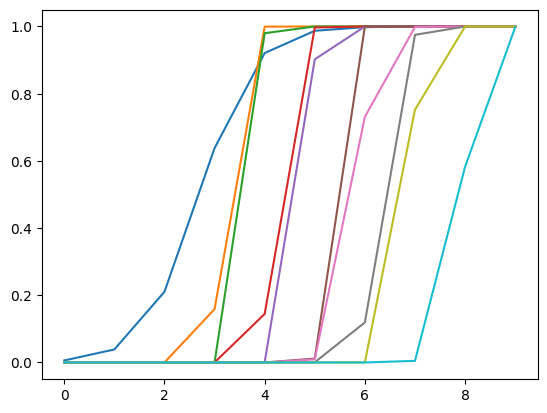

In [3]:
import seaborn as sns
for marker in canonical_generator.biomarker_values[:]:
    sns.lineplot(marker)

In [4]:
# run analysis
analyzer = DiseaseProgressionAnalyzer(patient_samples)
likelihood_matrix = analyzer.run_analysis('ebm')

# get parameters including spearman's rho
params = analyzer.ebm_analyzer.get_params()
rho = params['rho']
print("Spearman's rho values:", rho)

# print orders
analyzer.print_orders()

100%|██████████| 10000/10000 [00:02<00:00, 3516.54it/s]


Greedy Ascent Result: [0 1 2 3 4 6 5 7 8 9]


100%|██████████| 500000/500000 [02:16<00:00, 3659.03it/s]


ValueError: too many values to unpack (expected 6)

In [5]:
print(likelihood_matrix)
print(likelihood_matrix.shape)

[[6.46289890e-10 8.46665926e-01 1.28004874e-01 ... 1.30809070e-01
  1.18351262e-01 1.27847669e-01]
 [6.17736851e-10 9.23784388e-10 1.52438426e-01 ... 9.96795097e-02
  1.18351263e-01 1.27847670e-01]
 [9.91626225e-01 6.42721036e-10 8.76630626e-02 ... 1.30809071e-01
  1.18351263e-01 1.27847670e-01]
 ...
 [4.39167100e-10 6.37727016e-10 8.69819101e-02 ... 5.46382877e-03
  1.18351263e-01 1.22277027e-01]
 [4.55114971e-10 1.20163372e-04 9.01405627e-02 ... 1.21950729e-01
  1.18351263e-01 1.27847670e-01]
 [5.17345301e-10 8.40906952e-10 1.02465969e-01 ... 5.79551702e-08
  8.00839421e-09 7.66026717e-08]]
(10, 1000)


### TRANSITION MATRIX demo

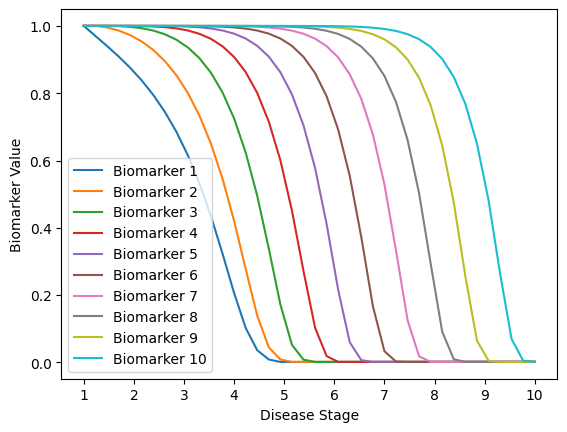

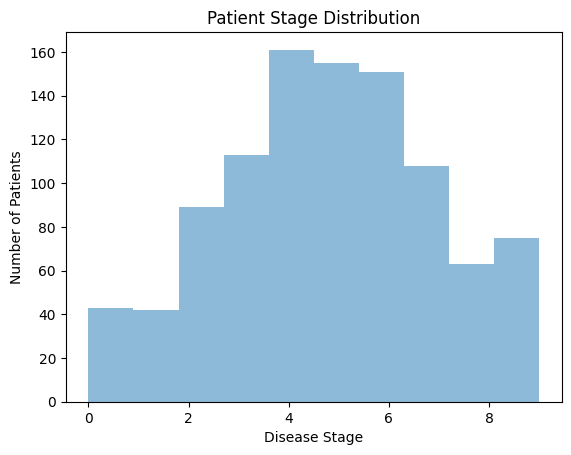

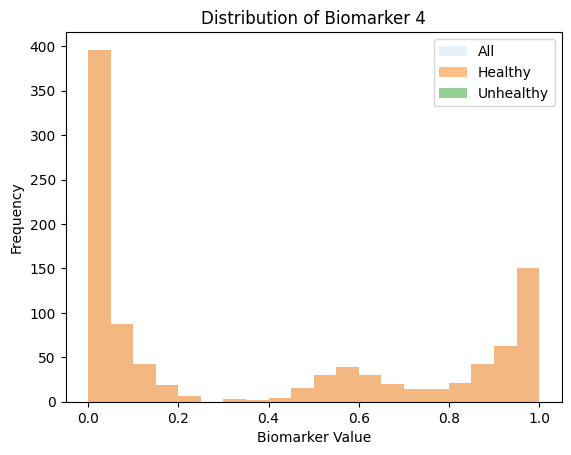

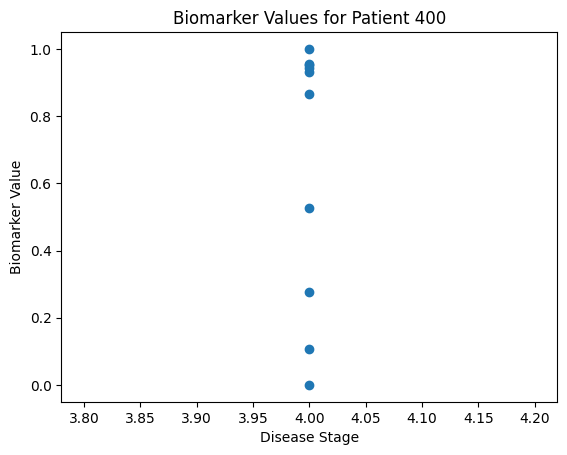

In [3]:
import sys
import os

# set the path to the parent directory of 'simulation_class'
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from simulation_class.canonical_generator import CanonicalGenerator
from simulation_class.sample_generator import SampleGenerator
from simulation_class.disease_progression_analyzer import DiseaseProgressionAnalyzer
from simulation_class.EBMAnalyzer import EBMAnalyzer

# model parameters
n_biomarker_stages = 10
model_type = 'transition_matrix'
biomarkers_params_transition = {'coeff': 1.5e-1}

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type, biomarkers_params=biomarkers_params_transition)
canonical_generator.plot_disease_progression() # plot disease progression

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std = 0.08, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

# plotting methods
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(biomarker_index = 3, healthy_stage_threshold=3)
sample_generator.plot_patient_biomarkers(patient_index=400)

In [7]:
print(canonical_generator.model_values.shape)
print(canonical_generator.biomarker_values.shape)

(10, 40)
(10, 10)


In [5]:
# run analysis
analyzer = DiseaseProgressionAnalyzer(patient_samples)
likelihood_matrix, orders, rho, loglike, update_iters, probas = analyzer.run_analysis('ebm')
print("Spearman's rho values:", rho)

# print orders
analyzer.print_orders()

100%|██████████| 10000/10000 [00:02<00:00, 3635.96it/s]


Greedy Ascent Result: [0 3 1 2 4 5 6 7 8 9]


100%|██████████| 500000/500000 [02:18<00:00, 3622.29it/s]

Spearman's rho values: 0.9636363636363635
First 10 MCMC sampled orders: [array([0, 3, 2, 1, 4, 5, 6, 7, 8, 9]), array([0, 3, 1, 2, 4, 5, 6, 7, 8, 9]), array([0, 3, 2, 1, 4, 5, 6, 7, 8, 9]), array([0, 3, 1, 2, 4, 5, 6, 7, 8, 9]), array([0, 3, 2, 1, 4, 5, 6, 7, 8, 9]), array([0, 3, 1, 2, 4, 5, 6, 7, 8, 9]), array([0, 3, 2, 1, 4, 5, 6, 7, 8, 9]), array([0, 3, 1, 2, 4, 5, 6, 7, 8, 9]), array([0, 3, 2, 1, 4, 5, 6, 7, 8, 9]), array([0, 3, 1, 2, 4, 5, 6, 7, 8, 9])]


## ODE demo

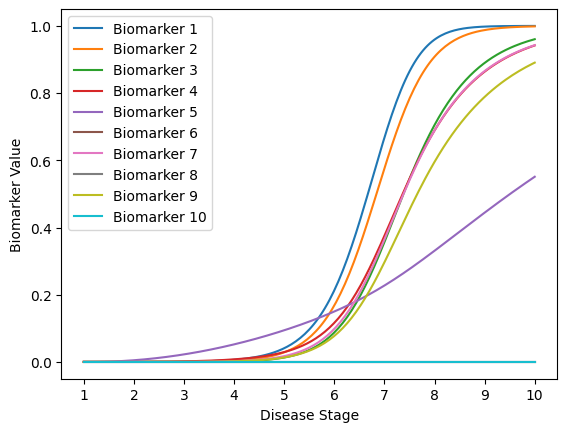

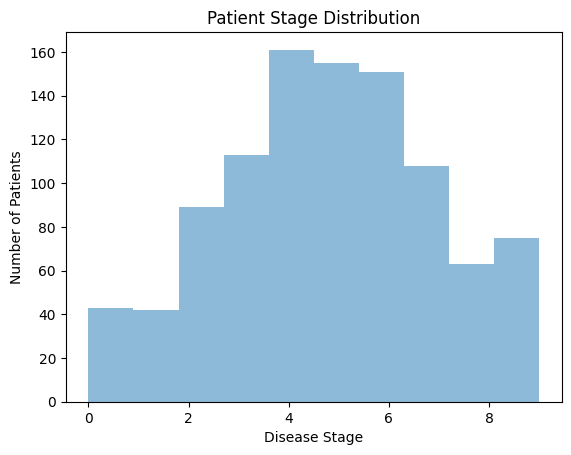

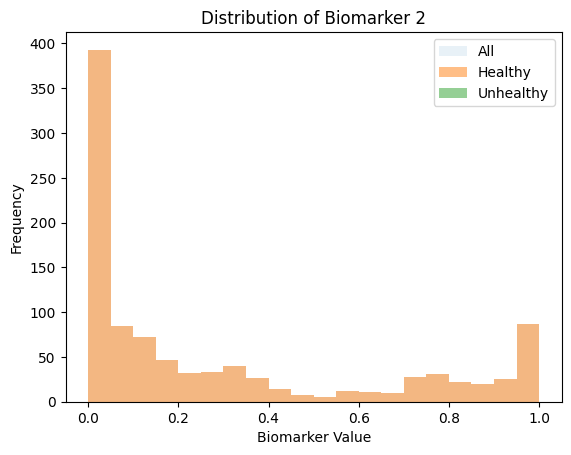

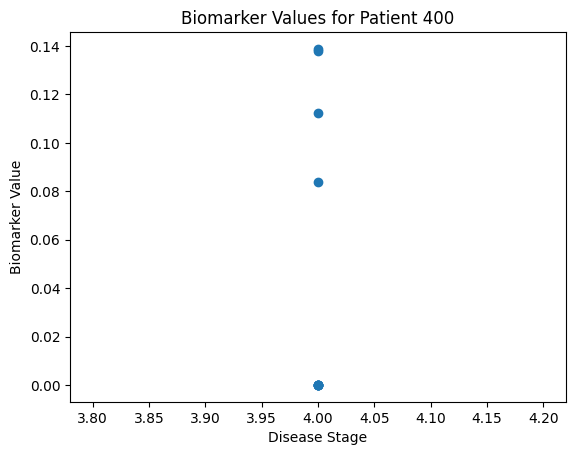

In [2]:
# TODO: add param grid options
# model parameters
n_biomarker_stages = 10
model_type = 'ode'

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type)
canonical_generator.plot_disease_progression()

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

# plot stage histogram
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(biomarker_index=1, healthy_stage_threshold=1)
sample_generator.plot_patient_biomarkers(patient_index=400)


(10, 203)
(10, 10)
0.9999293433204302
0.9985563765972792


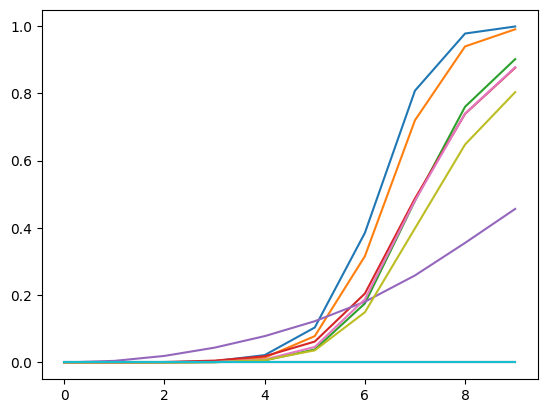

In [3]:
import seaborn as sns
print(canonical_generator.model_values.shape)
print(canonical_generator.biomarker_values.shape)

print(canonical_generator.model_values.max())
print(canonical_generator.biomarker_values.max())

for marker in canonical_generator.biomarker_values[:]:
    sns.lineplot(marker)

In [4]:
# run analysis
analyzer = DiseaseProgressionAnalyzer(patient_samples)
likelihood_matrix, orders, rho, loglike, update_iters, probas = analyzer.run_analysis('ebm')
print("Spearman's rho values:", rho)

# print orders
analyzer.print_orders()

100%|██████████| 10000/10000 [00:02<00:00, 3717.86it/s]


Greedy Ascent Result: [4 0 1 3 6 2 8 9 7 5]


100%|██████████| 500000/500000 [02:15<00:00, 3682.54it/s]


ValueError: attempt to get argmax of an empty sequence